In [1]:
from spectral_cube import SpectralCube
#from pvextractor import extract_pv_slice, Path
#import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
#from matplotlib.colors import LogNorm
#from astropy.visualization.stretch import SinhStretch
#from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from reproject import reproject_exact
from astropy.io import fits
from reproject.mosaicking import find_optimal_celestial_wcs


fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [2]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/

g5a.12CO.spw17.fits  g5a.CH3OH.spw21.fits  g5a.SiO.spw27.fits
g5a.13CO.spw29.fits  g5a.H2CO.spw23.fits
g5a.C18O.spw31.fits  g5a.H2CO.spw25.fits


In [3]:
ls /home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/

g5b.12CO.spw17.fits  g5b.CH3OH.spw21.fits  g5b.SiO.spw27.fits
g5b.13CO.spw29.fits  g5b.H2CO.spw23.fits
g5b.C18O.spw31.fits  g5b.H2CO.spw25.fits


In [4]:
a_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/baselineFixed/g5a.C18O.spw31.fits' 
               ]

b_fixednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/baselineFixed/g5b.C18O.spw31.fits'
               ]

In [5]:
a_reprojectednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.Ha.spw19.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw23.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.13CO.spw29.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.C18O.spw31.fits' 
               ]

b_reprojectednames = ['/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.12CO.spw17.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.Ha.spw19.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.CH3OH.spw21.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.H2CO.spw23.fits',  
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.H2CO.spw25.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.SiO.spw27.fits', 
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.13CO.spw29.fits',
               '/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/b/TP/2018.1.00862.S/galreprojected/g5b.C18O.spw31.fits'
               ]

In [6]:
combo_fixednames = [
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',
    'lol',
    #'/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.masked.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'
    ]

cube17 = SpectralCube.read(combo_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube21 = SpectralCube.read(combo_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube23 = SpectralCube.read(combo_fixednames[3]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube25 = SpectralCube.read(combo_fixednames[4]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube27 = SpectralCube.read(combo_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube29 = SpectralCube.read(combo_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube31 = SpectralCube.read(combo_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')

In [7]:
#cube17.allow_huge_operations=True
#(cube17*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',overwrite=True)

In [8]:
#(cube21*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',overwrite=True)

In [9]:
#(cube23*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',overwrite=True)

In [10]:
#(cube25*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',overwrite=True)

In [11]:
#(cube27*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',overwrite=True)

In [12]:
#(cube29*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',overwrite=True)

In [13]:
#(cube31*u.K).write('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits',overwrite=True)

In [14]:
a_cube17 = SpectralCube.read(a_fixednames[0])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube21 = SpectralCube.read(a_fixednames[2])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube23 = SpectralCube.read(a_fixednames[3])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube25 = SpectralCube.read(a_fixednames[4])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube27 = SpectralCube.read(a_fixednames[5])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube29 = SpectralCube.read(a_fixednames[6])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
a_cube31 = SpectralCube.read(a_fixednames[7])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)

In [15]:
b_cube17 = SpectralCube.read(b_fixednames[0])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube21 = SpectralCube.read(b_fixednames[2])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube23 = SpectralCube.read(b_fixednames[3])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube25 = SpectralCube.read(b_fixednames[4])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube27 = SpectralCube.read(b_fixednames[5])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube29 = SpectralCube.read(b_fixednames[6])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)
b_cube31 = SpectralCube.read(b_fixednames[7])#.spectral_slab(0*u.km / u.second, 200*u.km/u.second)

In [16]:
def noise_mask(cube, vmin, vmax, level):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).mad_std(axis=0)
    peak = cube.max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

INFO: Auto-setting vmin to -2.056e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.376e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.582e+00 [aplpy.core]
INFO: Auto-setting vmax to  5.932e+00 [aplpy.core]


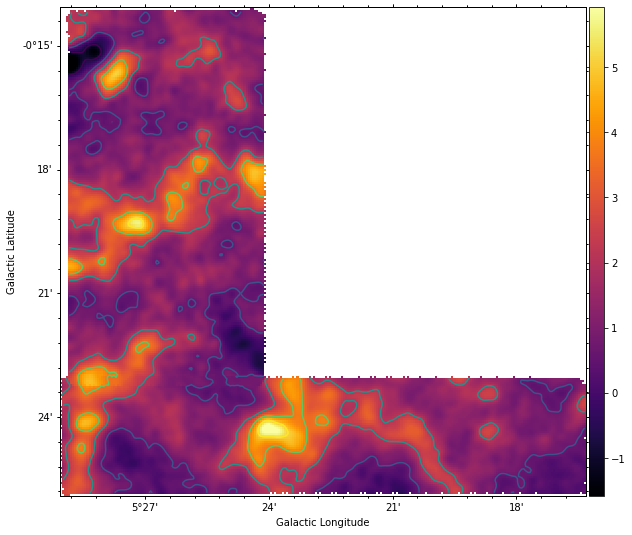

In [17]:
cube_comb = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits').with_spectral_unit(u.km/u.second, velocity_convention='radio').spectral_slab(0*u.km / u.second, 200*u.km/u.second)
mom0 = cube_comb.moment0()
mom0.quicklook()
mom0.FITSFigure.show_colorscale(cmap='inferno')
mom0.FITSFigure.show_contour(mom0.hdu)

In [18]:
#cube17_0.FITSFigure.show_contour?
cube17.allow_huge_operations=True

INFO: Auto-setting vmin to  1.062e+02 [aplpy.core]
INFO: Auto-setting vmax to  8.610e+02 [aplpy.core]
INFO: Auto-setting vmin to  9.930e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.673e+02 [aplpy.core]


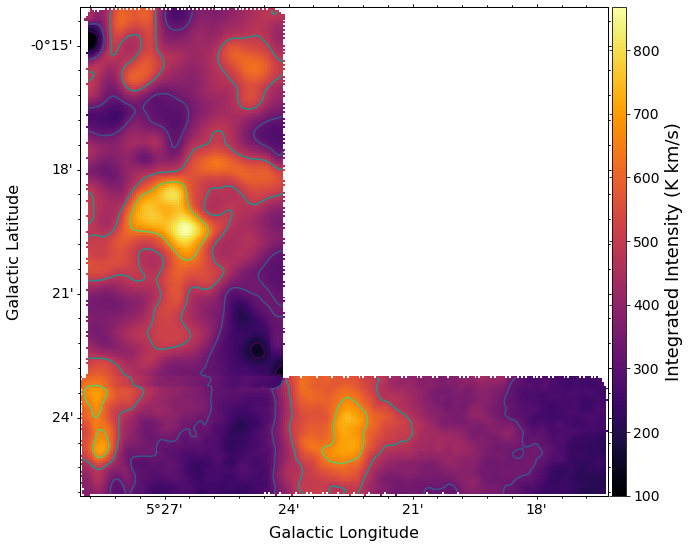

In [19]:
#cube17_masked = cube17.with_mask(noise_mask(cube17, 0*u.km/u.second, 200*u.km/u.second, 5.0))
cube17_masked = cube17.with_mask(cube17>0.05*u.K)
#cube17_0 = (cube17.with_mask(cube17>0.05*u.K)).moment0()
cube17_0 = cube17_masked.moment0()
cube17_0.quicklook()
cube17_0.FITSFigure.show_colorscale(cmap='inferno')
cube17_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
#levs = cube17_0.FITSFigure.show_contour(cube17.with_mask(cube17>0.05*u.K).moment0().hdu, returnlevels=True)
cube17_0.FITSFigure.show_contour(cube17_masked.moment0().hdu, returnlevels=True)
cube17_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_0.FITSFigure.colorbar.set_font(size=14)
cube17_0.FITSFigure.axis_labels.set_font(size=16)
cube17_0.FITSFigure.tick_labels.set_font(size=14)
#cube17_0.FITSFigure.show_regions('/orange/adamginsburg/cmz/g5/code/g5-lowvelo.reg')
#cube17_0.FITSFigure.show_regions('/orange/adamginsburg/cmz/g5/code/g5-highvelo.reg')
#cube17_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_17-reg.pdf')

In [20]:
#cube17_0.write('/orange/adamginsburg/cmz/g5/code/plots/mom0_17.fits')

In [21]:
#levs

INFO: Auto-setting vmin to -2.474e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.612e+00 [aplpy.core]
INFO: Auto-setting vmin to -2.531e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.357e+00 [aplpy.core]
INFO: Auto-setting resolution to 35.3201 dpi [aplpy.core]


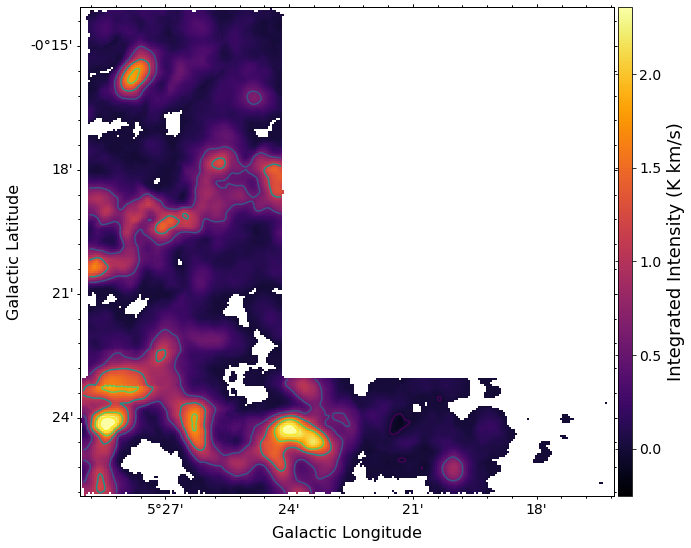

In [22]:
#cube21_masked = cube21.with_mask(noise_mask(cube21, 0*u.km/u.second, 200*u.km/u.second, 5.0))
cube21_0 = (cube21).moment0()
#cube21_0 = (cube21_masked).moment0()
cube21_0.quicklook()
#cube21_1.FITSFigure.show_colorscale(vmin=0, vmax=200, cmap='inferno')
cube21_0.FITSFigure.show_colorscale(cmap='inferno')
cube21_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube21_0.FITSFigure.show_contour(cube21.moment0().hdu)
#cube21_0.FITSFigure.show_contour(cube21_masked.moment0().hdu)
cube21_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube21_0.FITSFigure.colorbar.set_font(size=14)
cube21_0.FITSFigure.axis_labels.set_font(size=16)
cube21_0.FITSFigure.tick_labels.set_font(size=14)
cube21_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_21.pdf')

INFO: Auto-setting vmin to -5.539e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.042e+00 [aplpy.core]
INFO: Auto-setting vmin to -5.379e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.079e+00 [aplpy.core]


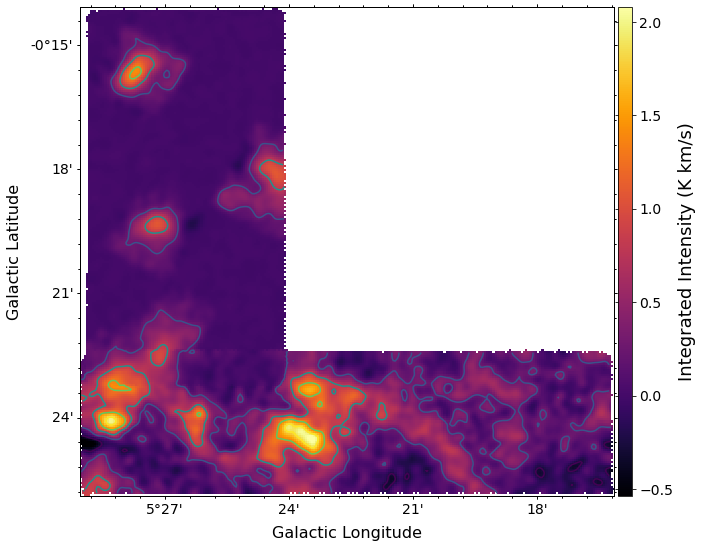

In [23]:
#cube23_masked = cube23.with_mask(noise_mask(cube23, 0*u.km/u.second, 200*u.km/u.second, 3.1))
cube23_0 = (cube23).moment0()
#cube23_0 = (cube23_masked).moment0()
cube23_0.quicklook()
cube23_0.FITSFigure.show_colorscale(cmap='inferno')
cube23_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube23_0.FITSFigure.show_contour(cube23.moment0().hdu)
#cube23_0.FITSFigure.show_contour(cube23_masked.moment0().hdu)
cube23_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube23_0.FITSFigure.colorbar.set_font(size=14)
cube23_0.FITSFigure.axis_labels.set_font(size=16)
cube23_0.FITSFigure.tick_labels.set_font(size=14)
#cube23_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_23.pdf')

INFO: Auto-setting vmin to -1.828e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.256e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.596e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.077e+00 [aplpy.core]


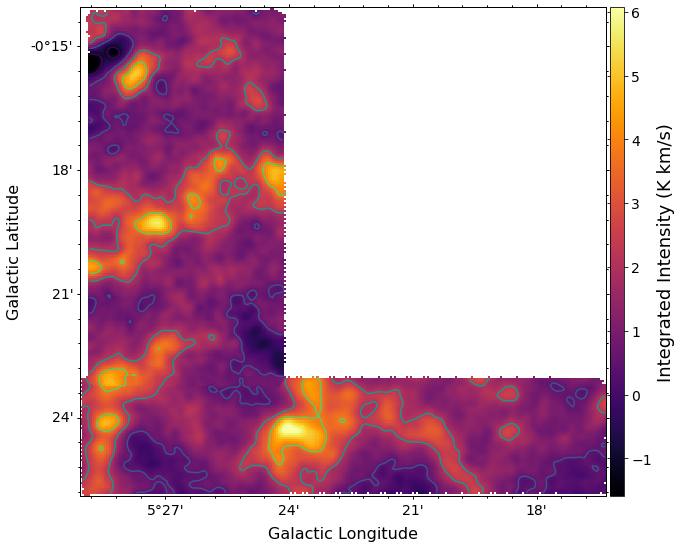

In [24]:
#cube25_masked = cube25.with_mask(noise_mask(cube25, 0*u.km/u.second, 200*u.km/u.second, 4.))
cube25_0 = (cube25).moment0()
#cube25_0 = (cube25_masked).moment0()
cube25_0.quicklook()
cube25_0.FITSFigure.show_colorscale(cmap='inferno')
cube25_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
#cube25_0.FITSFigure.show_contour(cube25.moment0().hdu)
levs=cube25_0.FITSFigure.show_contour(cube25.moment0().hdu, returnlevels=True)
#cube25_0.FITSFigure.show_contour(cube25_masked.moment0().hdu)
cube25_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube25_0.FITSFigure.colorbar.set_font(size=14)
cube25_0.FITSFigure.axis_labels.set_font(size=16)
cube25_0.FITSFigure.tick_labels.set_font(size=14)
#cube25_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_25.pdf')

In [25]:
np.nanmax(cube25_0)

<Projection 6.33119374 K km / s>

In [26]:
levs

array([-1.08968807,  0.54092979,  2.17154765,  3.80216552,  5.43278338])

In [27]:
#cube25_0.write('/orange/adamginsburg/cmz/g5/code/plots/mom0_25.fits')

INFO: Auto-setting vmin to -7.596e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.426e+00 [aplpy.core]
INFO: Auto-setting vmin to -7.345e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.447e+00 [aplpy.core]


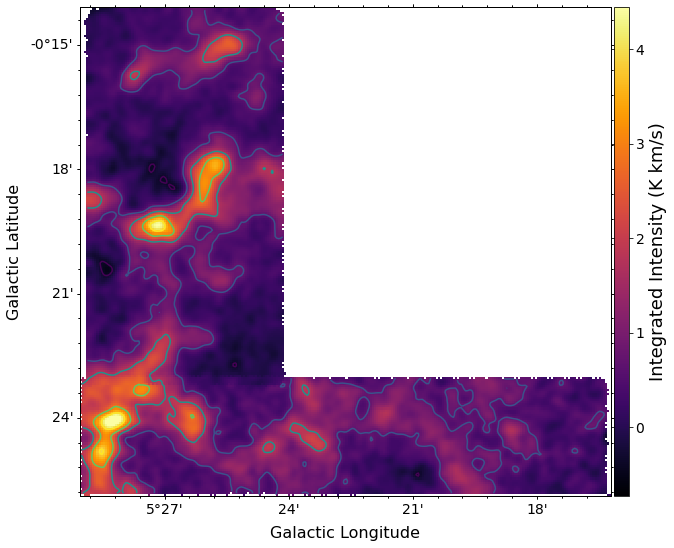

In [28]:
#cube27_masked = cube27.with_mask(noise_mask(cube27, 0*u.km/u.second, 200*u.km/u.second, 3.5))
cube27_0 = (cube27).moment0()
#cube27_0 = (cube27_masked).moment0()
cube27_0.quicklook()
cube27_0.FITSFigure.show_colorscale(cmap='inferno')
cube27_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
levs = cube27_0.FITSFigure.show_contour(cube27.moment0().hdu, returnlevels=True)
#cube27_0.FITSFigure.show_contour(cube27_masked.moment0().hdu)
cube27_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube27_0.FITSFigure.colorbar.set_font(size=14)
cube27_0.FITSFigure.axis_labels.set_font(size=16)
cube27_0.FITSFigure.tick_labels.set_font(size=14)
#cube27_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_27.pdf')

In [29]:
np.nanmax(cube27_0)

<Projection 4.89073891 K km / s>

In [30]:
levs

array([-0.34826266,  0.70941153,  1.76708573,  2.82475992,  3.88243411])

INFO: Auto-setting vmin to  3.671e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.560e+01 [aplpy.core]
INFO: Auto-setting vmin to  3.571e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.413e+01 [aplpy.core]
INFO: Auto-setting resolution to 35.6144 dpi [aplpy.core]


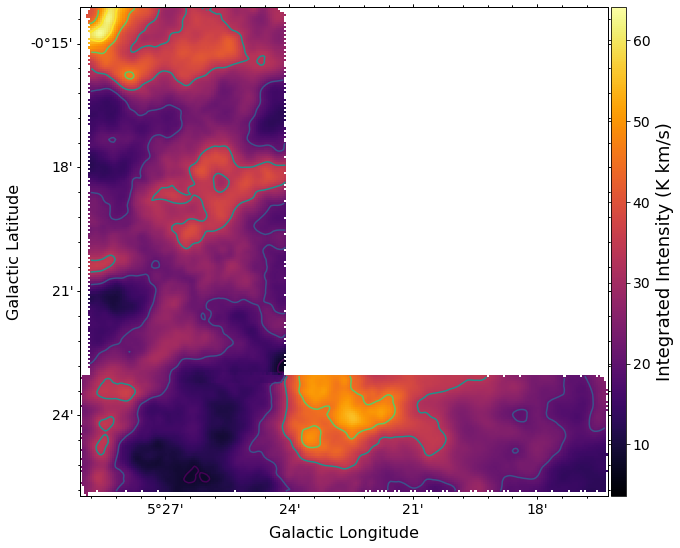

In [31]:
cube29_0 = (cube29.with_mask(cube29>0.05*u.K)).moment0()
cube29_0.quicklook()
cube29_0.FITSFigure.show_colorscale(cmap='inferno')
cube29_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube29_0.FITSFigure.show_contour(cube29.with_mask(cube29>0.05*u.K).moment0().hdu)
cube29_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube29_0.FITSFigure.colorbar.set_font(size=14)
cube29_0.FITSFigure.axis_labels.set_font(size=16)
cube29_0.FITSFigure.tick_labels.set_font(size=14)
cube29_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_29.pdf')

INFO: Auto-setting vmin to -1.375e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.050e+01 [aplpy.core]
INFO: Auto-setting vmin to -1.615e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.056e+01 [aplpy.core]
INFO: Auto-setting resolution to 35.4673 dpi [aplpy.core]


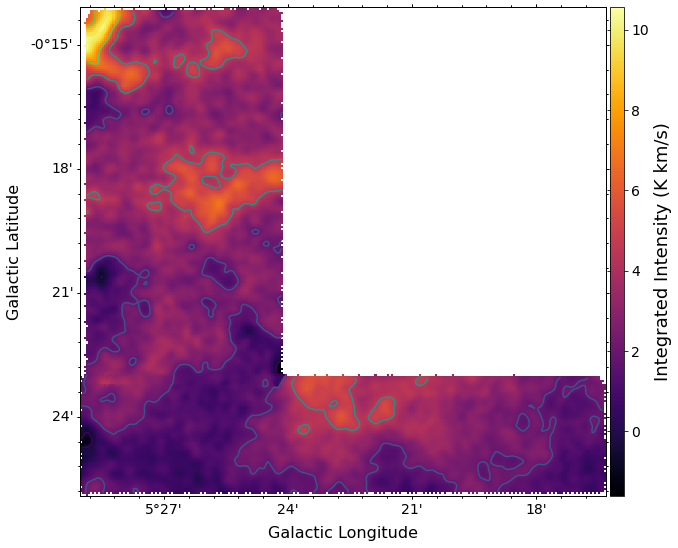

In [32]:
cube31_0 = (cube31).moment0()
cube31_0.quicklook()
cube31_0.FITSFigure.show_colorscale(cmap='inferno')
cube31_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube31_0.FITSFigure.show_contour(cube31.moment0().hdu)
cube31_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube31_0.FITSFigure.colorbar.set_font(size=14)
cube31_0.FITSFigure.axis_labels.set_font(size=16)
cube31_0.FITSFigure.tick_labels.set_font(size=14)
cube31_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_31.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/_moments.py:87: RuntimeWarning: invalid value encountered in divide
  return result / weights


INFO: Auto-setting vmin to  1.748e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.328e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.712e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.333e+02 [aplpy.core]
INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


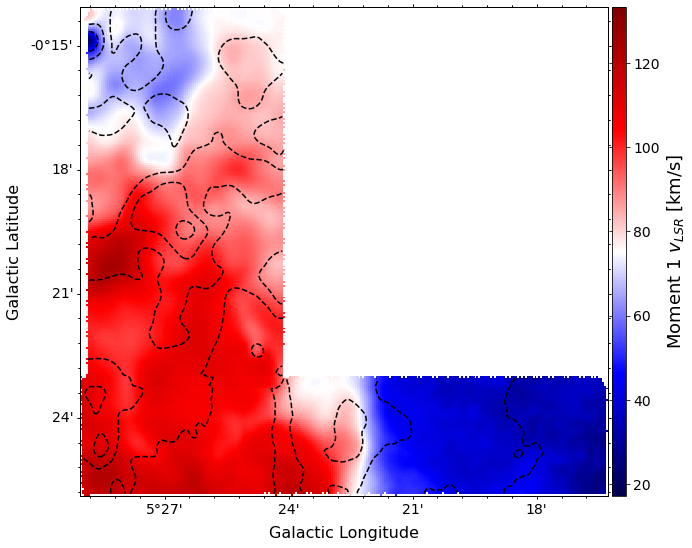

In [37]:
cube17_1 = (cube17.with_mask(cube17>0.05*u.K)).moment1()
cube17_1.quicklook()
cube17_1.FITSFigure.show_colorscale(cmap='seismic')
cube17_1.FITSFigure.colorbar.set_axis_label_text('Moment 1 $v_{LSR}$ [km/s]')
cube17_1.FITSFigure.show_contour(cube17.with_mask(cube17>0.05*u.K).moment0().hdu, linestyles='dashed', colors='black')
cube17_1.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_1.FITSFigure.colorbar.set_font(size=14)
cube17_1.FITSFigure.axis_labels.set_font(size=16)
cube17_1.FITSFigure.tick_labels.set_font(size=14)
cube17_1.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom1_17.pdf')

INFO: Auto-setting vmin to  3.970e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.530e+02 [aplpy.core]
INFO: Auto-setting vmin to  3.957e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.532e+02 [aplpy.core]
INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


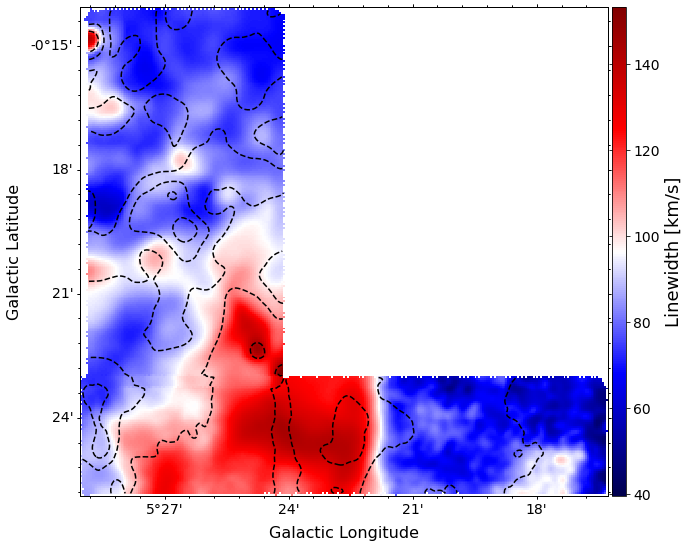

In [36]:
cube17_2 = (cube17.with_mask(cube17>0.05*u.K)).linewidth_fwhm()
cube17_2.quicklook()
cube17_2.FITSFigure.show_colorscale(cmap='seismic')
cube17_2.FITSFigure.colorbar.set_axis_label_text('Linewidth [km/s]')
cube17_2.FITSFigure.show_contour(cube17.with_mask(cube17>0.05*u.K).moment0().hdu, linestyles='dashed', colors='black')
cube17_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_2.FITSFigure.colorbar.set_font(size=14)
cube17_2.FITSFigure.axis_labels.set_font(size=16)
cube17_2.FITSFigure.tick_labels.set_font(size=14)
cube17_2.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_17.pdf')

In [ ]:
np.nanmax(cube17_2)

In [ ]:
left_cu = cube17.spectral_slab(75*u.km / u.second, 225*u.km/u.second)
righ_cu = cube17.spectral_slab(15*u.km / u.second, 75*u.km/u.second)
mid_cub = cube17.spectral_slab(50*u.km / u.second, 225*u.km/u.second)
mid_2ub = cube17.spectral_slab(15*u.km / u.second, 50*u.km/u.second)

In [ ]:
cube17a_0 = (left_cu.with_mask(left_cu>0.05*u.K)).moment0()
cube17a_0.quicklook()
cube17a_0.FITSFigure.show_colorscale(cmap='inferno')
levsa = cube17a_0.FITSFigure.show_contour(left_cu.with_mask(left_cu>0.05*u.K).moment0().hdu, returnlevels=True)
cube17a_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17a_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17a_0.FITSFigure.colorbar.set_font(size=14)
cube17a_0.FITSFigure.axis_labels.set_font(size=16)
cube17a_0.FITSFigure.tick_labels.set_font(size=14)
cube17a_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_G5a_17.pdf')

In [ ]:
levsa

In [ ]:
cube17b_0 = (righ_cu.with_mask(righ_cu>0.05*u.K)).moment0()
cube17b_0.quicklook()
cube17b_0.FITSFigure.show_colorscale(cmap='inferno')
levsb = cube17b_0.FITSFigure.show_contour(righ_cu.with_mask(righ_cu>0.05*u.K).moment0().hdu, returnlevels=True)
cube17b_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17b_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17b_0.FITSFigure.colorbar.set_font(size=14)
cube17b_0.FITSFigure.axis_labels.set_font(size=16)
cube17b_0.FITSFigure.tick_labels.set_font(size=14)
cube17b_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_G5b_17.pdf')

In [ ]:
levsb

In [ ]:
cube17a2_0 = (mid_cub.with_mask(mid_cub>0.05*u.K)).moment0()
cube17a2_0.quicklook()
cube17a2_0.FITSFigure.show_colorscale(cmap='inferno')
levsa = cube17a2_0.FITSFigure.show_contour(mid_cub.with_mask(mid_cub>0.05*u.K).moment0().hdu, returnlevels=True)
cube17a2_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17a2_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17a2_0.FITSFigure.colorbar.set_font(size=14)
cube17a2_0.FITSFigure.axis_labels.set_font(size=16)
cube17a2_0.FITSFigure.tick_labels.set_font(size=14)

In [ ]:
levsa

In [ ]:
cube17b2_0 = (mid_2ub.with_mask(mid_2ub>0.05*u.K)).moment0()
cube17b2_0.quicklook()
cube17b2_0.FITSFigure.show_colorscale(cmap='inferno')
levsb = cube17b2_0.FITSFigure.show_contour(mid_2ub.with_mask(mid_2ub>0.05*u.K).moment0().hdu, returnlevels=True)
cube17b2_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17b2_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17b2_0.FITSFigure.colorbar.set_font(size=14)
cube17b2_0.FITSFigure.axis_labels.set_font(size=16)
cube17b2_0.FITSFigure.tick_labels.set_font(size=14)

In [ ]:
levsb

In [ ]:
cube17_1 = (left_cu.with_mask(left_cu>0.05*u.K)).moment1()
cube17_1.quicklook()
cube17_1.FITSFigure.show_colorscale(cmap='seismic')
cube17_1.FITSFigure.colorbar.set_axis_label_text('(km/s)')
cube17_1.FITSFigure.show_contour(left_cu.with_mask(left_cu>0.05*u.K).moment0().hdu)
cube17_1.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_1.FITSFigure.colorbar.set_font(size=14)
cube17_1.FITSFigure.axis_labels.set_font(size=16)
cube17_1.FITSFigure.tick_labels.set_font(size=14)
#cube17_1.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom1_17.pdf')

In [ ]:
cube17_1 = (righ_cu.with_mask(righ_cu>0.05*u.K)).moment1()
cube17_1.quicklook()
cube17_1.FITSFigure.show_colorscale(cmap='seismic')
cube17_1.FITSFigure.colorbar.set_axis_label_text('(km/s)')
cube17_1.FITSFigure.show_contour(righ_cu.with_mask(righ_cu>0.05*u.K).moment0().hdu)
cube17_1.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_1.FITSFigure.colorbar.set_font(size=14)
cube17_1.FITSFigure.axis_labels.set_font(size=16)
cube17_1.FITSFigure.tick_labels.set_font(size=14)
#cube17_1.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom1_17.pdf')

In [ ]:
cube17a_2 = (left_cu.with_mask(left_cu>0.05*u.K)).linewidth_fwhm()
cube17a_2 = cube17a_2/(cube17a_0 > 162 * u.K * u.km / u.second)
cube17a_2.quicklook()
cube17a_2.FITSFigure.show_colorscale(cmap='seismic')
cube17a_2.FITSFigure.colorbar.set_axis_label_text('(km/s)')
cube17a_2.FITSFigure.show_contour(left_cu.with_mask(left_cu>0.05*u.K).moment0().hdu)
cube17a_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17a_2.FITSFigure.colorbar.set_font(size=14)
cube17a_2.FITSFigure.axis_labels.set_font(size=16)
cube17a_2.FITSFigure.tick_labels.set_font(size=14)
#cube17a_2.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_17.pdf')

In [ ]:
cube17a2_2 = (mid_cub.with_mask(mid_cub>0.05*u.K)).linewidth_fwhm()
cube17a2_2 = cube17a2_2/(cube17a2_0 > 200 * u.K * u.km / u.second)
cube17a2_2.quicklook()
cube17a2_2.FITSFigure.show_colorscale(cmap='seismic')
cube17a2_2.FITSFigure.colorbar.set_axis_label_text('(km/s)')
cube17a2_2.FITSFigure.show_contour(mid_cub.with_mask(mid_cub>0.05*u.K).moment0().hdu)
cube17a2_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17a2_2.FITSFigure.colorbar.set_font(size=14)
cube17a2_2.FITSFigure.axis_labels.set_font(size=16)
cube17a2_2.FITSFigure.tick_labels.set_font(size=14)
#cube17a_2.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_17.pdf')

In [ ]:
cube17b_2 = (righ_cu.with_mask(righ_cu>0.05*u.K)).linewidth_fwhm()
cube17b_2 = cube17b_2/(cube17b_0 > 100 * u.K * u.km / u.second)
cube17b_2.quicklook()
cube17b_2.FITSFigure.show_colorscale(cmap='seismic')
cube17b_2.FITSFigure.colorbar.set_axis_label_text('(km/s)')
cube17b_2.FITSFigure.show_contour(righ_cu.with_mask(righ_cu>0.05*u.K).moment0().hdu)
cube17b_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17b_2.FITSFigure.colorbar.set_font(size=14)
cube17b_2.FITSFigure.axis_labels.set_font(size=16)
cube17b_2.FITSFigure.tick_labels.set_font(size=14)
#cube17b_2.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_17.pdf')

In [ ]:
cube17b2_2 = (mid_2ub.with_mask(mid_2ub>0.05*u.K)).linewidth_fwhm()
cube17b2_2 = cube17b2_2/(cube17b2_0 > 78 * u.K * u.km / u.second)
cube17b2_2.quicklook()
cube17b2_2.FITSFigure.show_colorscale(cmap='seismic')
cube17b2_2.FITSFigure.colorbar.set_axis_label_text('(km/s)')
cube17b2_2.FITSFigure.show_contour(mid_2ub.with_mask(mid_2ub>0.05*u.K).moment0().hdu)
cube17b2_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17b2_2.FITSFigure.colorbar.set_font(size=14)
cube17b2_2.FITSFigure.axis_labels.set_font(size=16)
cube17b2_2.FITSFigure.tick_labels.set_font(size=14)
#cube17b_2.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_17.pdf')

In [ ]:
cube25_1 = (cube25).moment1()
cube25_1 = cube25_1/(cube25_0 > (1.0*u.K * u.km / u.second))
cube25_1.quicklook()
cube25_1.FITSFigure.show_colorscale(cmap='seismic')
cube25_1.FITSFigure.colorbar.set_axis_label_text('Velocity [km/s]')
levs = cube25_1.FITSFigure.show_contour(cube25.moment0().hdu, returnlevels=True)
cube25_1.FITSFigure.colorbar.set_axis_label_font(size=18)
cube25_1.FITSFigure.colorbar.set_font(size=14)
cube25_1.FITSFigure.axis_labels.set_font(size=16)
cube25_1.FITSFigure.tick_labels.set_font(size=14)

In [ ]:
cube25_2 = (cube25).linewidth_fwhm()
cube25_2 = cube25_2/(cube25_0 > (1.0*u.K * u.km / u.second))
cube25_2.quicklook()
cube25_2.FITSFigure.show_colorscale(cmap='seismic')
cube25_2.FITSFigure.colorbar.set_axis_label_text('Linewidth [km/s]')
cube25_2.FITSFigure.show_contour(cube25.moment0().hdu, returnlevels=True)
cube25_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube25_2.FITSFigure.colorbar.set_font(size=14)
cube25_2.FITSFigure.axis_labels.set_font(size=16)
cube25_2.FITSFigure.tick_labels.set_font(size=14)

In [ ]:
levs

In [ ]:
cube25_2.write('/orange/adamginsburg/cmz/g5/code/plots/mom2_25.fits')

In [ ]:
def name_to_galactic(name):
    cube = SpectralCube.read(name)
    hdu = cube[45]
    #print(hdu.data[0])
    wcs, shape = find_optimal_celestial_wcs([hdu.hdu], frame='galactic')
    cube.reproject(wcs)
    
def cube_to_galactic(cube):
    #cube = SpectralCube.read(name)
    hdu = cube[45]
    #print(hdu.data[0])
    wcs, shape = find_optimal_celestial_wcs([hdu.hdu], frame='galactic', auto_rotate=False)
    header = cube.header.copy()
    header['NAXIS'] = 3
    header['NAXIS1'] = shape[1]
    header['NAXIS2'] = shape[0]
    header['NAXIS3'] = cube.shape[0]
    header.update(wcs.to_header())
    header['WCSAXES'] = 3
    #print(cube.shape, shape)
    #print(header)
    return cube.reproject(header).minimal_subcube(spatial_only=True)


In [ ]:
#b_cube17_0.FITSFiguredfdsg

In [ ]:
'''def cube_to_galactic(cube):
    hdu = cube.hdu
    wcs, shape = find_optimal_celestial_wcs(hdu, frame='galactic')
    #new_header['CTYPE1'] = 'GLON-CAR'   
    #new_header['CTYPE2'] = 'GLAT-CAR' 
    ## CRPIX1, CRPIX2
    ## CRVAL1, CRVAL2
    ## CRDELT1, CRDELT2
    #array_new, footprint = reproject_exact(hdu, wcs, shape)
    reprojected = cube.reproject(wcs.to_header())
    # optimal WCS
    #fits.writeto('reprojected_image.fits', array_new, wcs.to_header(), overwrite=True)
    #return new_image, footprint, new_header
    #
    '''
#type(b_cube17[45].array)

In [ ]:
#cube_save = cube_to_galactic(b_cube21)

In [ ]:
#cube_save.write('')

In [ ]:
b_cube21.moment0().quicklook()


In [ ]:
cube_save.moment0().quicklook()
plt.colorbar()

In [ ]:
help(rpj.mosaicking.wcs_helpers.find_optimal_celestial_wcs)

In [ ]:
hdu = fits.open('reprojected_image.fits')[0]

In [ ]:
plt.imshow(np.array(hdu.data))
ww = wcs.WCS(hdu.header)
fig = plt.figure(1, figsize=(8,8))
fig.clf()
ax = fig.add_subplot(projection=ww.celestial)

In [ ]:
#ax = plt.subplot(111, projection=b_cube17.wcs.celestial)
b_cube21_1 = b_cube21.moment1()
b_cube21_1.quicklook()
b_cube21_1.FITSFigure.show_colorscale(vmin=80, vmax=125,cmap='inferno')
b_cube21_1.FITSFigure.show_contour(b_cube21.moment0().hdu)
#cb = plt.colorbar()
#cb.set_label(b_cube17_1.unit)

In [ ]:
ax = plt.subplot(111, projection=b_cube17.wcs.celestial)
world_argmax_map = b_cube17.argmax_world(axis=0)
world_argmax_map.quicklook()
cb = plt.colorbar()
cb.set_label(world_argmax_map.unit)

In [ ]:
ax = plt.subplot(111, projection=b_cube17.wcs.celestial)
b_cube17_2 = b_cube17.moment2()
b_cube17_2.quicklook()
cb = plt.colorbar()
cb.set_label(b_cube17_2.unit)

In [ ]:
ax = plt.subplot(111, projection=b_cube17.wcs.celestial)
b_cube17_fwhm = b_cube17.linewidth_sigma()
b_cube17_fwhm.quicklook()
cb = plt.colorbar()
cb.set_label(b_cube17_fwhm.unit)

In [ ]:
ax = plt.subplot(111, projection=a_cube17.wcs.celestial)
a_cube17_0 = a_cube17.moment0()
a_cube17_0.quicklook()
cb = plt.colorbar()
cb.set_label(a_cube17_0.unit)

In [ ]:
ax = plt.subplot(111, projection=a_cube17.wcs.celestial)
a_cube17_1 = a_cube17.moment1()
a_cube17_1.quicklook()
cb = plt.colorbar()
cb.set_label(a_cube17_1.unit)

In [ ]:
ax = plt.subplot(111, projection=a_cube17.wcs.celestial)
a_cube17_2 = a_cube17.moment2()
a_cube17_2.quicklook()
cb = plt.colorbar()
cb.set_label(a_cube17_2.unit)

In [ ]:
ax = plt.subplot(111, projection=a_cube17.wcs.celestial)
a_cube17_fwhm = a_cube17.linewidth_sigma()
a_cube17_fwhm.quicklook()
cb = plt.colorbar()
cb.set_label(a_cube17_fwhm.unit)

In [ ]:
ax = plt.subplot(111, projection=a_cube17.wcs.celestial)
a_cube17.allow_huge_operations=True
world_argmax_map = a_cube17.argmax_world(axis=0)
world_argmax_map.quicklook()
cb = plt.colorbar()
cb.set_label(world_argmax_map.unit)

In [ ]:
'/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.SiO.spw27_test.fits'